# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import itertools

# Importing Data

In [2]:
previous_application = pd.read_csv("previous_application.csv")

# Data Dimensions

In [3]:
print ("previous_application :",previous_application.shape)

previous_application : (1670214, 37)


# First Few rows of Data

In [4]:
display("previous_application ")
display(previous_application.head(3))

'previous_application '

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


# Percentage of Missing values in previous_application

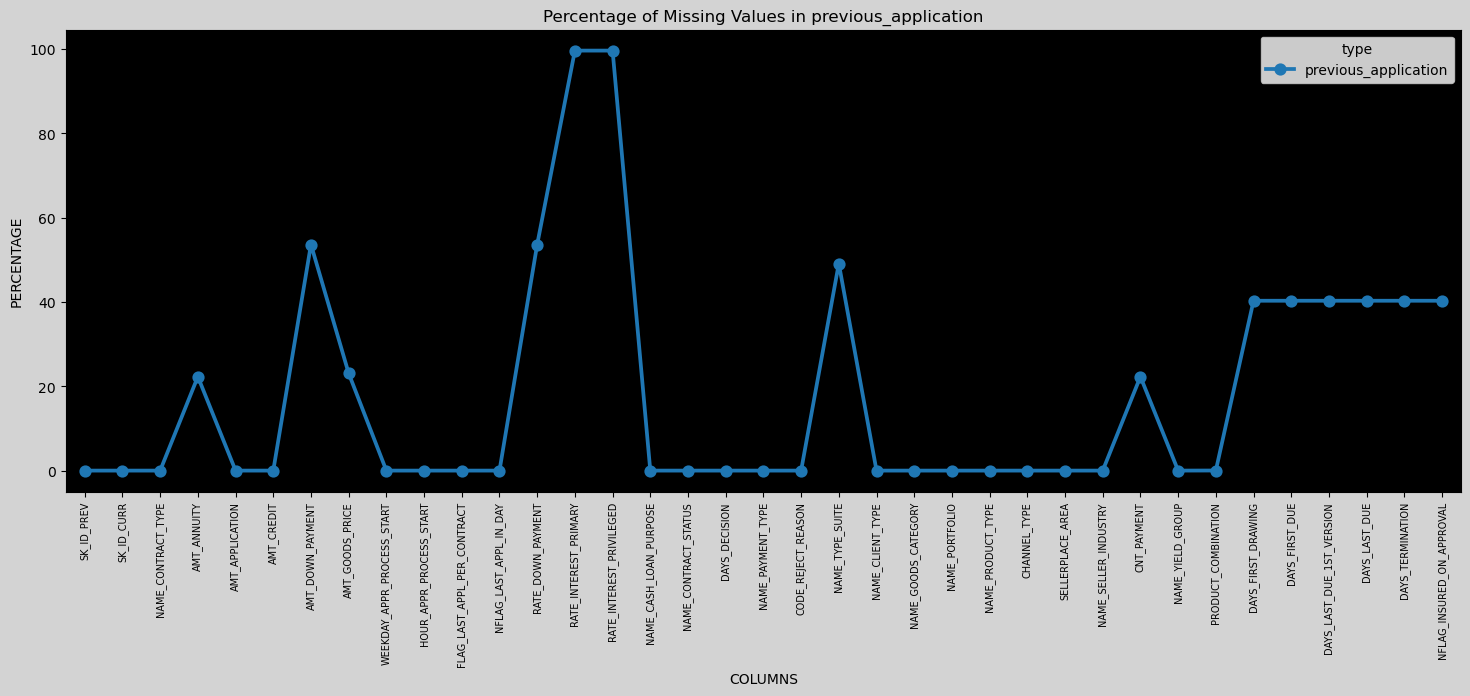

In [5]:
fig = plt.figure(figsize=(18, 6))
fig.set_facecolor("lightgrey")

missing_percentage = previous_application.isnull().sum() * 100 / previous_application.shape[0]
miss_previous_application = pd.DataFrame(missing_percentage).reset_index()
miss_previous_application.columns = ["COLUMNS", "PERCENTAGE"]
miss_previous_application["type"] = "previous_application"

ax = sns.pointplot(data=miss_previous_application, x="COLUMNS", y="PERCENTAGE", hue="type")

plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values in previous_application")
plt.xlabel("COLUMNS")
plt.ylabel("PERCENTAGE")

ax.set_facecolor("k")

plt.show()


In [6]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

# Removing columns with missing values more than 50%

In [7]:
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
"RATE_INTEREST_PRIVILEGED"],axis=1)

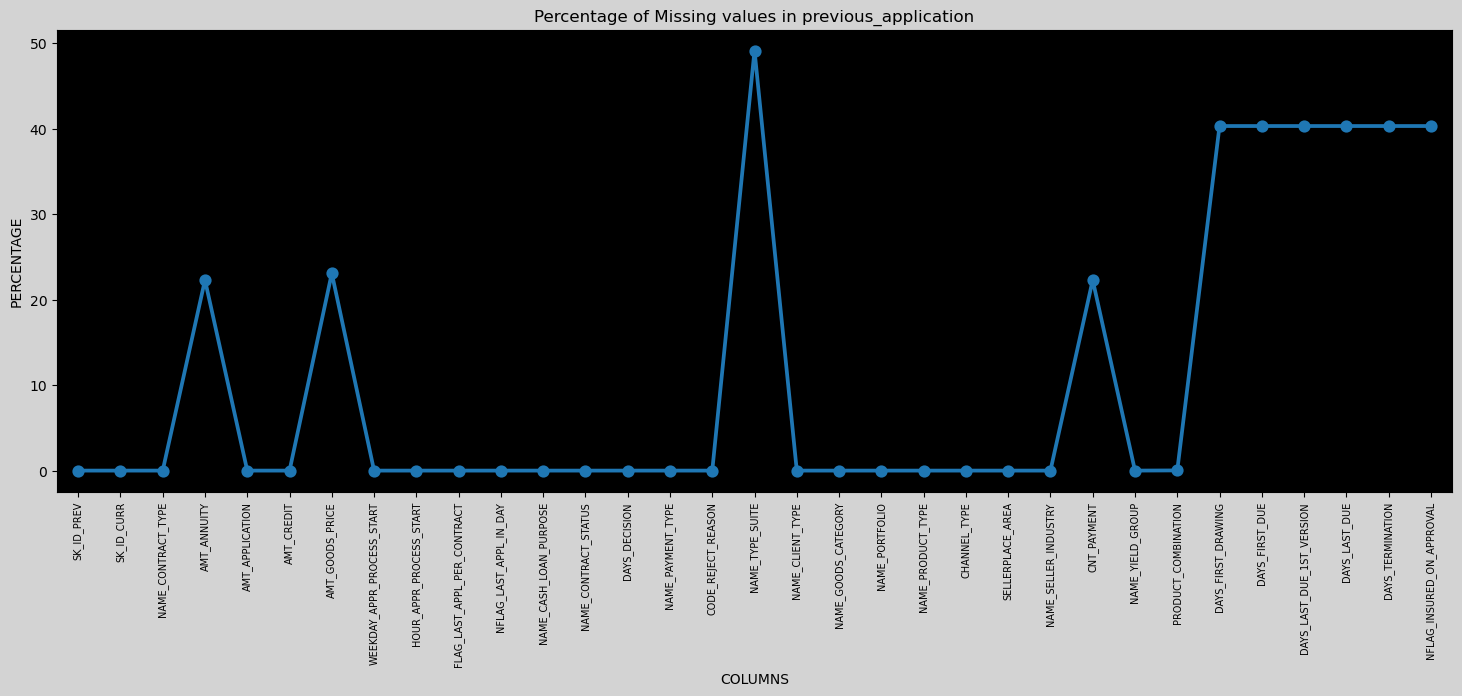

In [8]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()

ax = sns.pointplot(x = "index" ,y = 0,data=miss_previous_application)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

In [9]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

In [10]:
print ("previous_application :",previous_application.shape)

previous_application : (1670214, 33)


MISSING values Suggestion

In [11]:
print("AMT_ANNUITY NULL COUNT:" ,previous_application['AMT_ANNUITY'].isnull().sum())

AMT_ANNUITY NULL COUNT: 372235


In [12]:
previous_application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

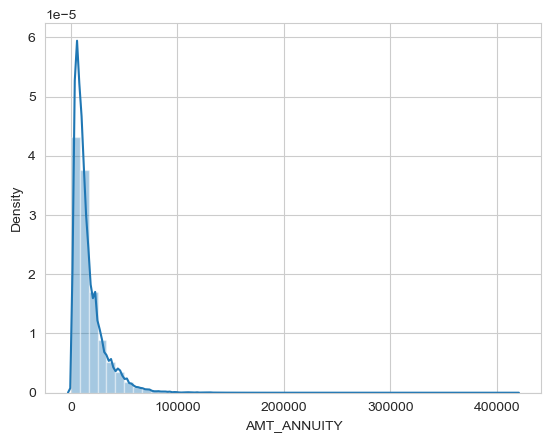

In [13]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_ANNUITY']) 
plt.show()

In [14]:
print("AMT_GOODS_PRICE NULL COUNT:" ,previous_application['AMT_GOODS_PRICE'].isnull().sum())

AMT_GOODS_PRICE NULL COUNT: 385515


In [15]:
previous_application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

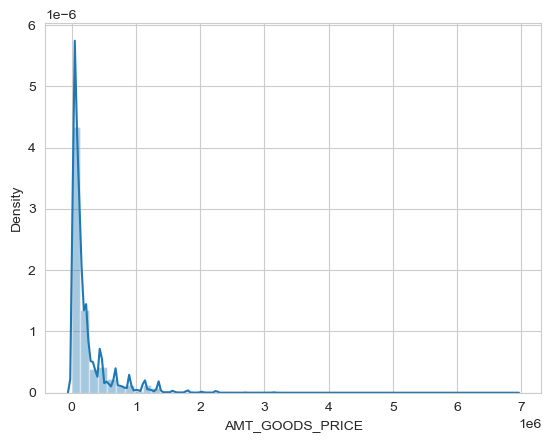

In [16]:
sns.set_style('whitegrid') 
sns.distplot(previous_application['AMT_GOODS_PRICE']) 
plt.show()

In [17]:
print("NAME_TYPE_SUITE NULL COUNT:" ,previous_application['NAME_TYPE_SUITE'].isnull().sum())

NAME_TYPE_SUITE NULL COUNT: 820405


In [18]:
previous_application['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: count, dtype: int64

In [19]:
print("CNT_PAYMENT NULL COUNT:" ,previous_application['CNT_PAYMENT'].isnull().sum())

CNT_PAYMENT NULL COUNT: 372230


In [20]:
previous_application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

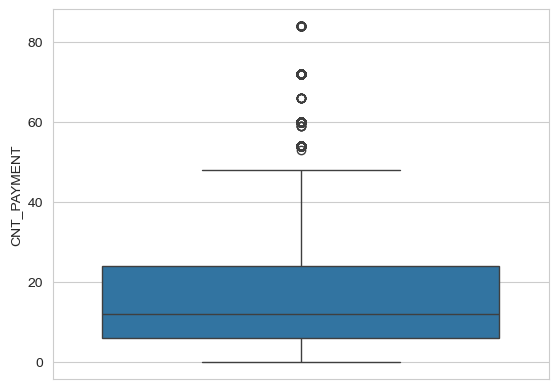

In [21]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['CNT_PAYMENT']) 
plt.show()

In [22]:
print("DAYS_FIRST_DRAWING :" ,previous_application['CNT_PAYMENT'].isnull().sum())

DAYS_FIRST_DRAWING : 372230


In [23]:
previous_application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

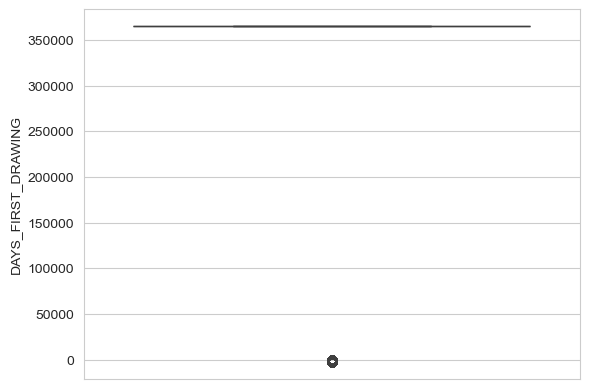

In [24]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_FIRST_DRAWING']) 
plt.show()

In [25]:
print("DAYS_FIRST_DUE :" ,previous_application['DAYS_FIRST_DUE'].isnull().sum())

DAYS_FIRST_DUE : 673065


In [26]:
previous_application['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

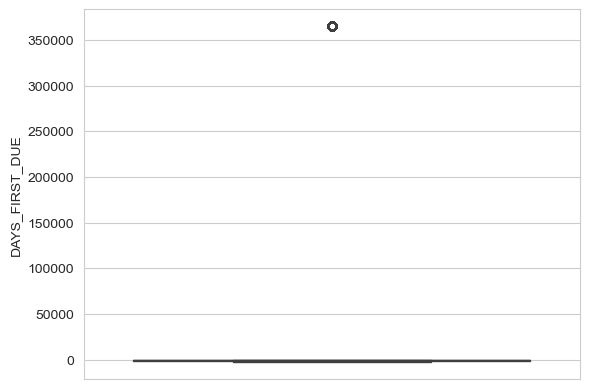

In [27]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_FIRST_DUE']) 
plt.show()

In [28]:
print("DAYS_LAST_DUE_1ST_VERSION :" ,previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum())

DAYS_LAST_DUE_1ST_VERSION : 673065


In [29]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

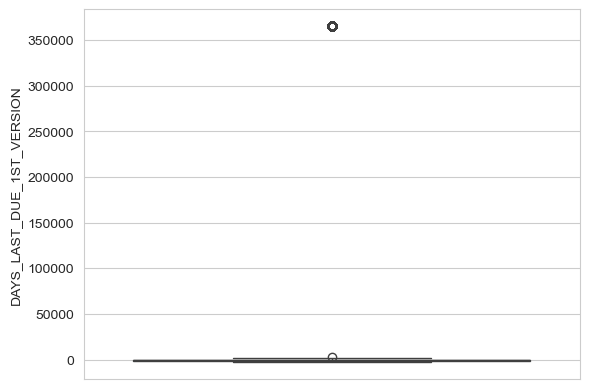

In [30]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_LAST_DUE_1ST_VERSION']) 
plt.show()

In [31]:
print("DAYS_LAST_DUE:" ,previous_application['DAYS_LAST_DUE'].isnull().sum())

DAYS_LAST_DUE: 673065


In [32]:
previous_application['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

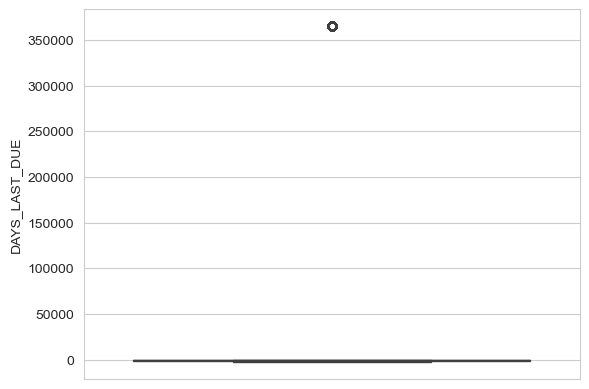

In [33]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_LAST_DUE']) 
plt.show()

In [34]:
print("DAYS_TERMINATION :" ,previous_application['DAYS_TERMINATION'].isnull().sum())

DAYS_TERMINATION : 673065


In [35]:
previous_application['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

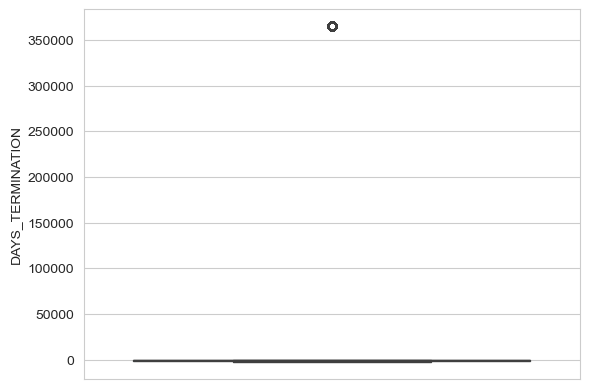

In [36]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_TERMINATION']) 
plt.show()

In [37]:
print("DAYS_TERMINATION :" ,previous_application['DAYS_TERMINATION'].isnull().sum())

DAYS_TERMINATION : 673065


In [38]:
previous_application['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

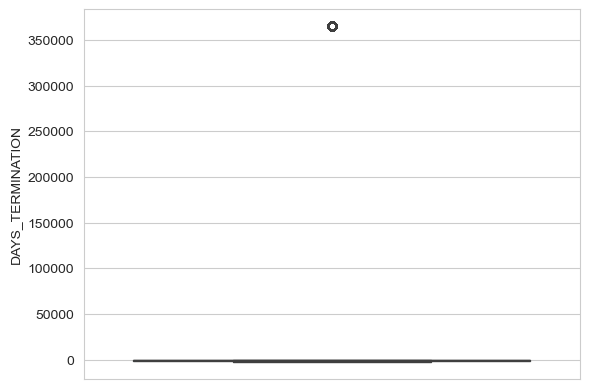

In [39]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['DAYS_TERMINATION']) 
plt.show()

In [40]:
print("NFLAG_INSURED_ON_APPROVAL:" ,previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum())

NFLAG_INSURED_ON_APPROVAL: 673065


In [41]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

NFLAG_INSURED_ON_APPROVAL
0.0    665527
1.0    331622
Name: count, dtype: int64

In [42]:
previous_application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [43]:
print("AMT_CREDIT :" ,previous_application['AMT_CREDIT'].isnull().sum())

AMT_CREDIT : 1


In [44]:
previous_application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

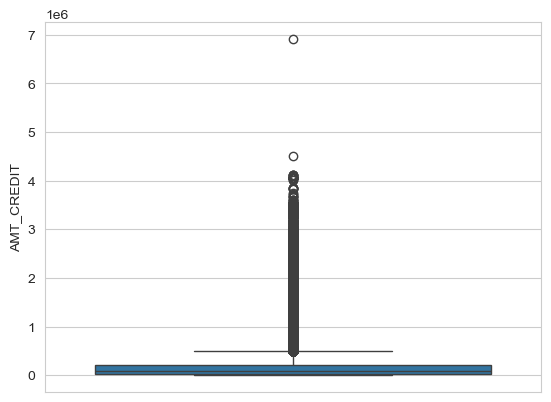

In [45]:
sns.set_style('whitegrid') 
sns.boxplot(previous_application['AMT_CREDIT']) 
plt.show()

In [46]:
print("PRODUCT_COMBINATION :" ,previous_application['PRODUCT_COMBINATION'].isnull().sum())

PRODUCT_COMBINATION : 346


In [47]:
previous_application['PRODUCT_COMBINATION'].value_counts()

PRODUCT_COMBINATION
Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: count, dtype: int64

In [48]:
# contains a set of constants, each representing a different ANSI escape code. 
# These escape codes are used to modify the text appearance in command-line outputs, such as changing text color, adding bold or underline effects, and more.

class color:
    PURPLE = '\033[95m'
    BLUE = '\033[94m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

Separating numerical and categorical columns from previous_application

In [49]:
obj_dtypes = [i for i in previous_application.select_dtypes(include='object').columns if i not in ["type"] ]
num_dtypes = [i for i in previous_application.select_dtypes(include = np.number).columns if i not in ['SK_ID_CURR'] + [ 'TARGET']]

In [50]:
print(color.BOLD + color.BLUE + 'Categorical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Categorical Columns 

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


In [51]:
print(color.BOLD + color.BLUE + 'Numerical Columns' + color.END, "\n")
for x in range(len(obj_dtypes)): 
    print(obj_dtypes[x])

Numerical Columns 

NAME_CONTRACT_TYPE
WEEKDAY_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
NAME_PAYMENT_TYPE
CODE_REJECT_REASON
NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
NAME_SELLER_INDUSTRY
NAME_YIELD_GROUP
PRODUCT_COMBINATION


# Current loan id having previous loan applications.

SK_ID_PREV - ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit).

SK_ID_CURR ID of loan in our sample.

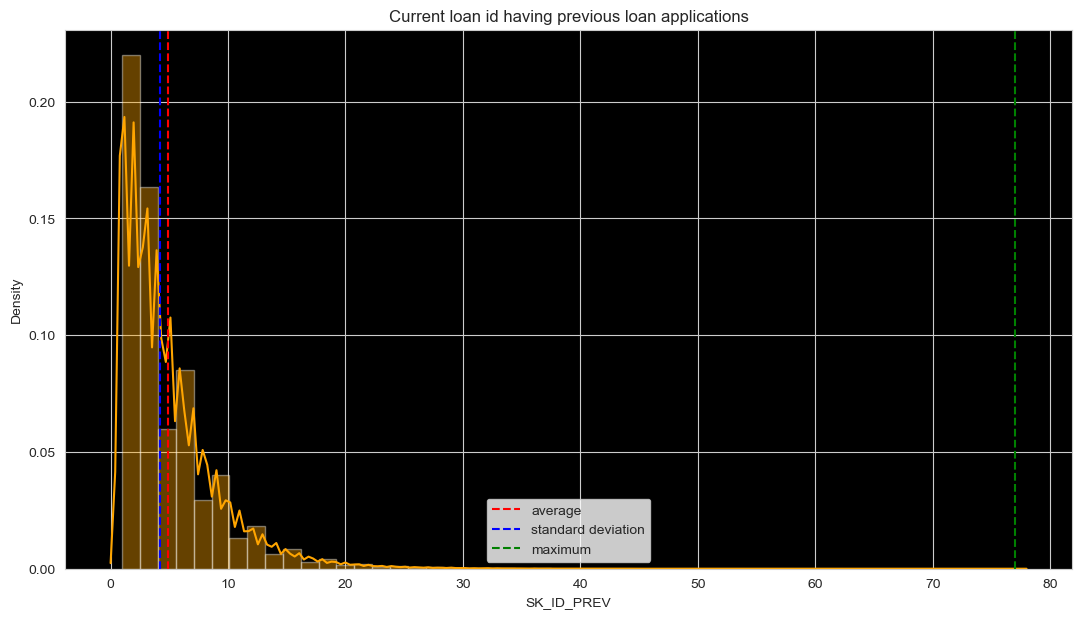

In [52]:
x = previous_application.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="orange")
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color="b",label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan id having previous loan applications")
ax.set_facecolor("k")

Point to infer from the graph -

On average current loan ids have 4 to 5 loan applications previously

# Contract types in previous applications

NAME_CONTRACT_TYPE Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.

In [53]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


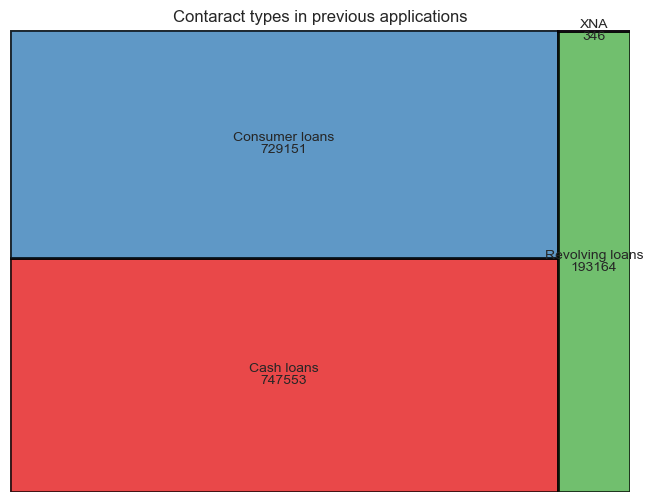

In [54]:
cnts = previous_application["NAME_CONTRACT_TYPE"].value_counts()
import squarify
plt.figure(figsize=(8,6))
squarify.plot(cnts.values,label=cnts.keys(),value=cnts.values,linewidth=2,edgecolor="k",alpha=.8,color=sns.color_palette("Set1"))
plt.axis("off")
plt.title("Contaract types in previous applications")
plt.show()

Point to infer from the graph -

Cash loan applications are maximum followed by consumer loan applications.

# Previous loan amounts applied and loan amounts credited.

AMT_APPLICATION-For how much credit did client ask on the previous application.

AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT.

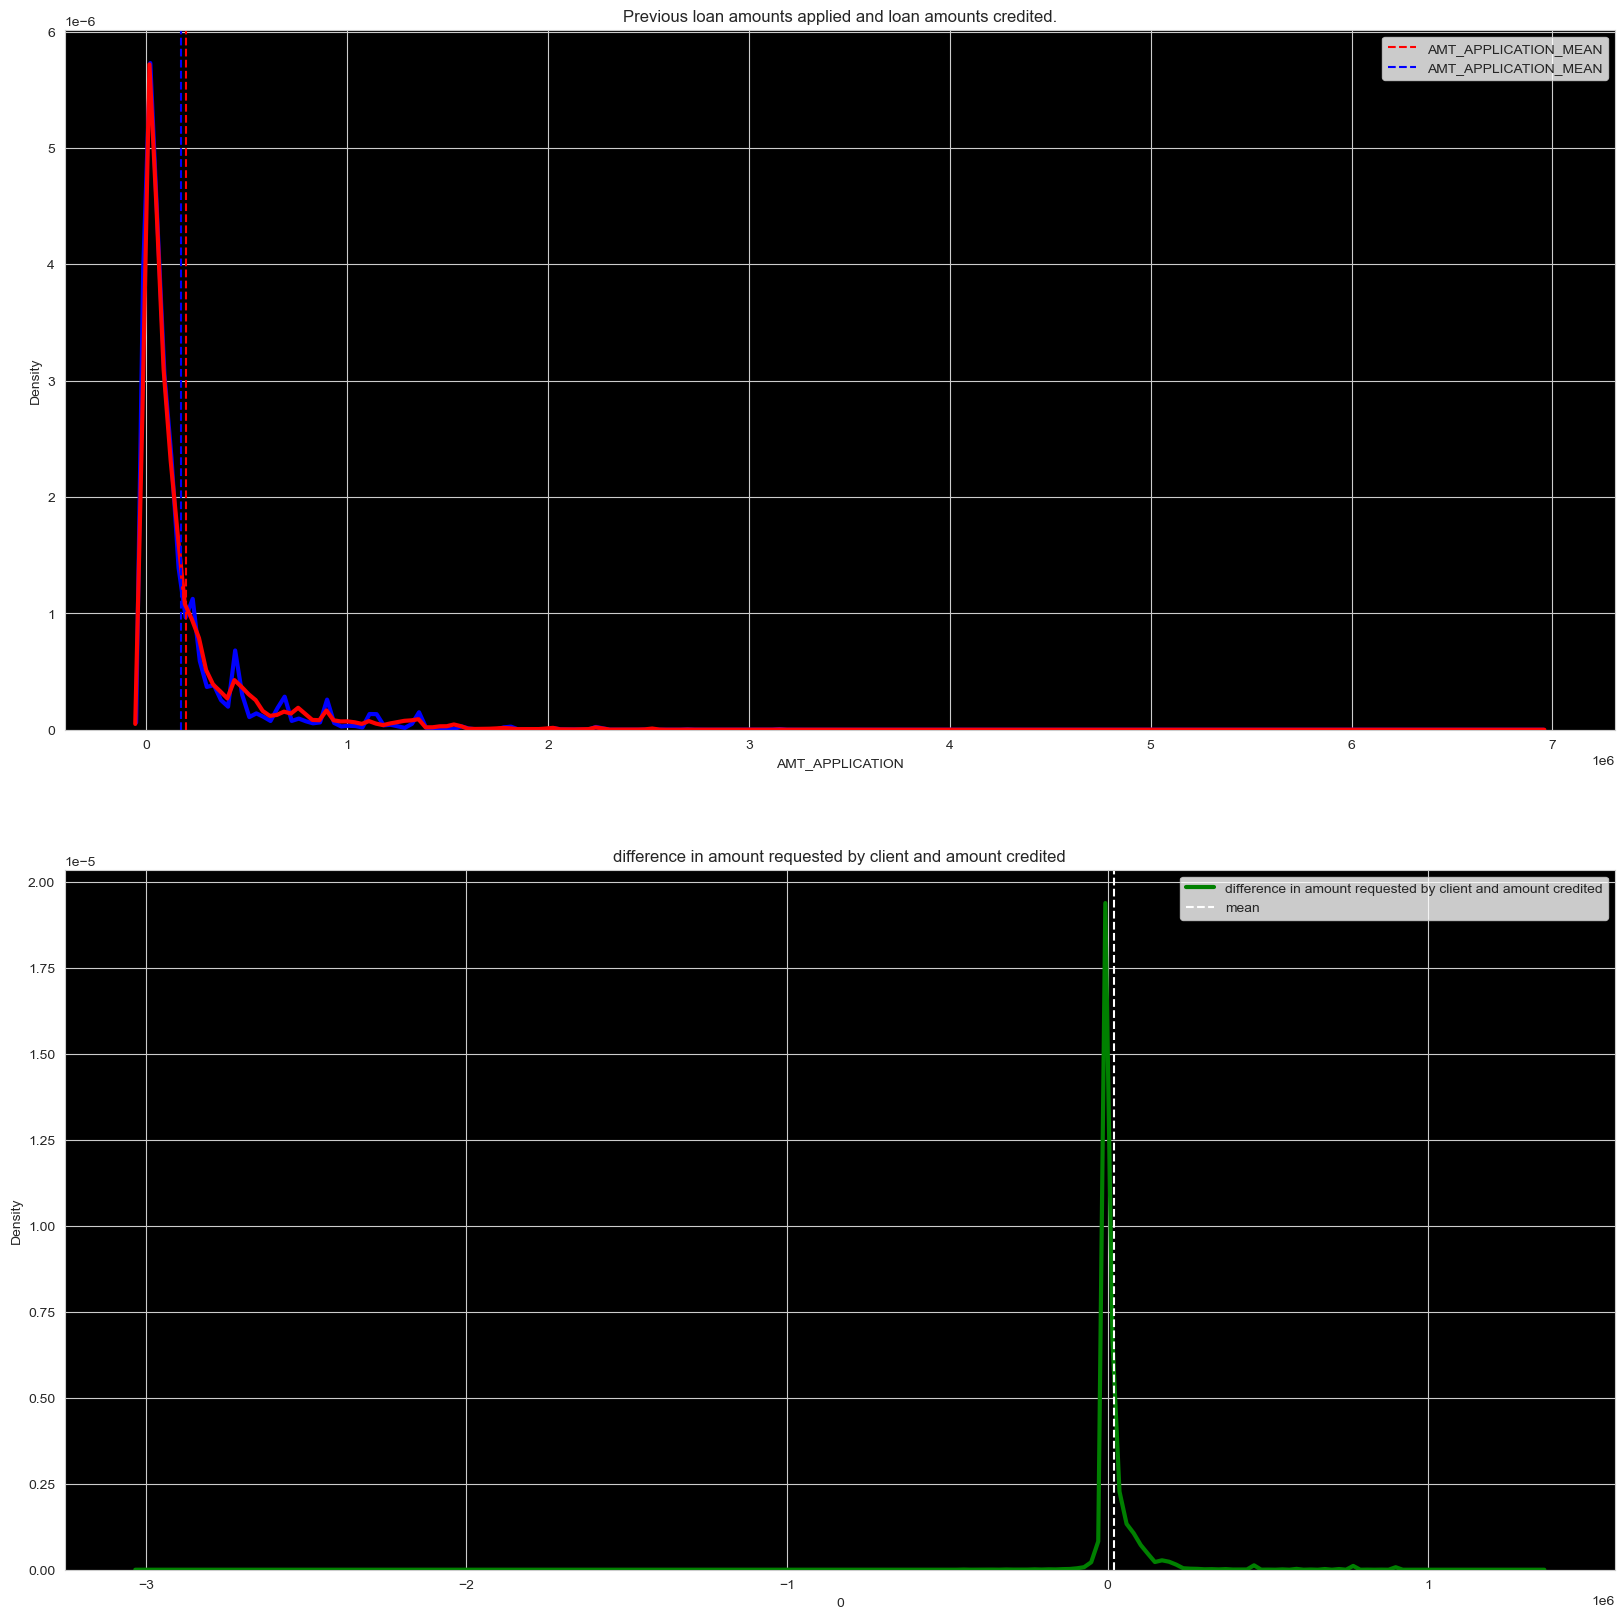

In [55]:
plt.figure(figsize=(20,20))
plt.subplot(211)
ax = sns.kdeplot(previous_application["AMT_APPLICATION"],color="b",linewidth=3)
ax = sns.kdeplot(previous_application[previous_application["AMT_CREDIT"].notnull()]["AMT_CREDIT"],color="r",linewidth=3)
plt.axvline(previous_application[previous_application["AMT_CREDIT"].notnull()]["AMT_CREDIT"].mean(),color="r",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.axvline(previous_application["AMT_APPLICATION"].mean(),color="b",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.legend(loc="best")
plt.title("Previous loan amounts applied and loan amounts credited.")
ax.set_facecolor("k")

plt.subplot(212)
diff = (previous_application["AMT_CREDIT"] - previous_application["AMT_APPLICATION"]).reset_index()
diff = diff[diff[0].notnull()]
ax1 = sns.kdeplot(diff[0],color="g",linewidth=3,label = "difference in amount requested by client and amount credited")
plt.axvline(diff[0].mean(),color="white",linestyle="dashed",label = "mean")
plt.title("difference in amount requested by client and amount credited")
ax1.legend(loc="best")
ax1.set_facecolor("k")

# Total and average amounts applied and credited in previous applications 

AMT_APPLICATION-For how much credit did client ask on the previous application. 

AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client.

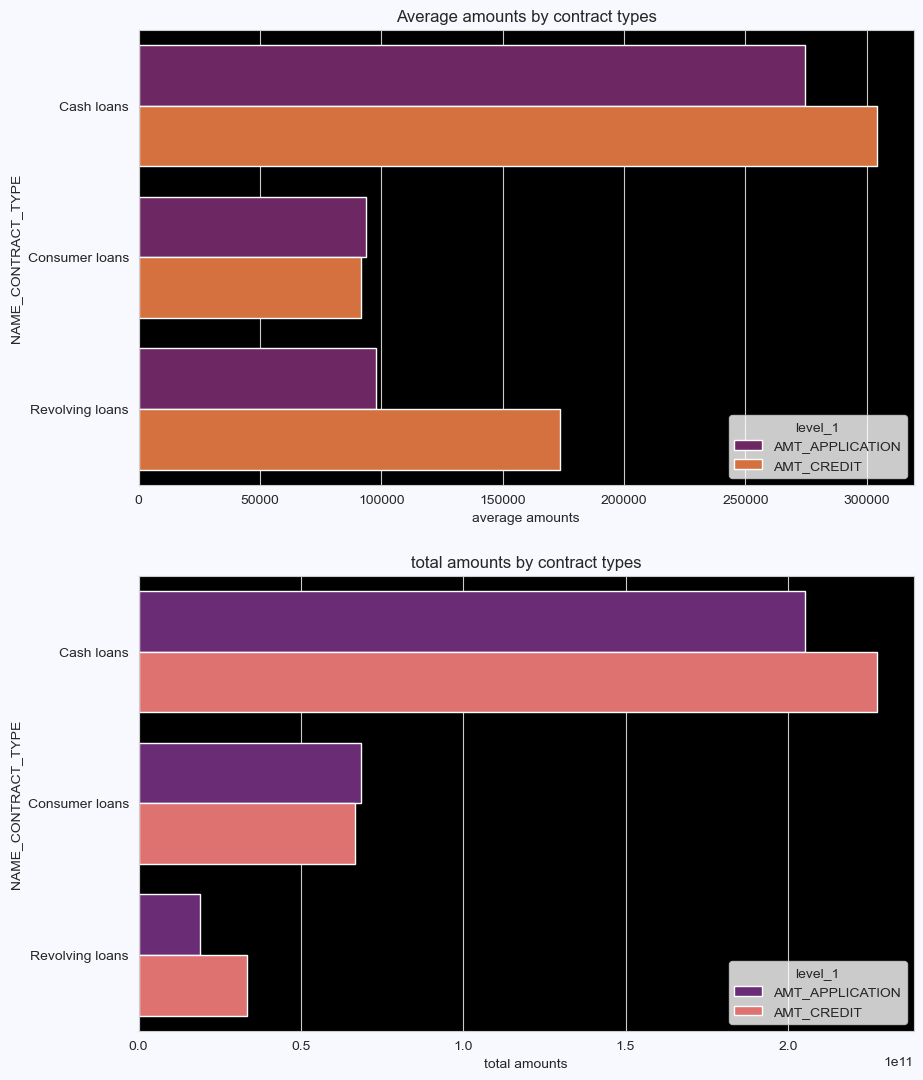

In [57]:
mn = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].mean().stack().reset_index()
tt = previous_application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].sum().stack().reset_index()
fig = plt.figure(figsize=(10,13))
fig.set_facecolor("ghostwhite")
plt.subplot(211)
ax = sns.barplot(x = 0,y = "NAME_CONTRACT_TYPE",data=mn[:6],hue="level_1",palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("average amounts")
ax.set_title("Average amounts by contract types")

plt.subplot(212)
ax1 = sns.barplot(x = 0,y = "NAME_CONTRACT_TYPE",data=tt[:6],hue="level_1",palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("total amounts")
ax1.set_title("total amounts by contract types")
plt.subplots_adjust(hspace = .2)
plt.show()

# Annuity of previous application 

AMT_ANNUITY - Annuity of previous application

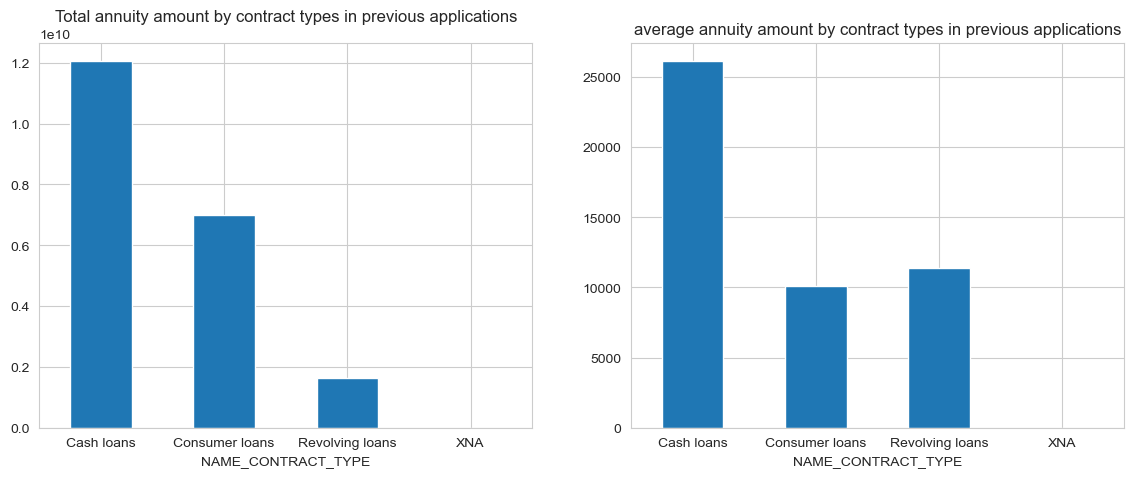

In [58]:
plt.figure(figsize=(14,5))
plt.subplot(121)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
previous_application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()

# Count of application status by application type.

NAME_CONTRACT_TYPE -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.

NAME_CONTRACT_STATUS -Contract status (approved, cancelled, ...) of previous application.

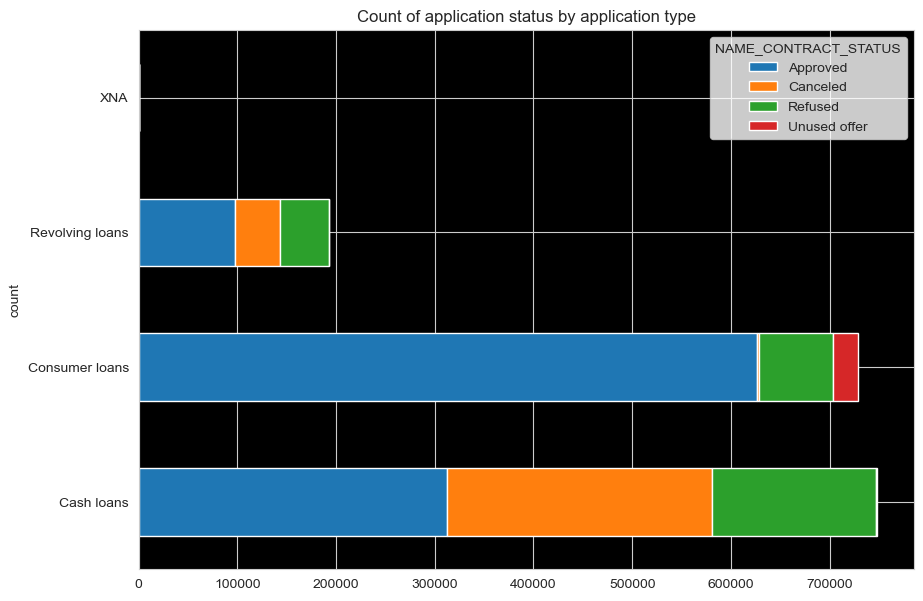

In [59]:
ax = pd.crosstab(previous_application["NAME_CONTRACT_TYPE"],previous_application["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
ax.set_facecolor("k")

Point to infer from the graph -

Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.

# Contract status by weekdays -

WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for previous application

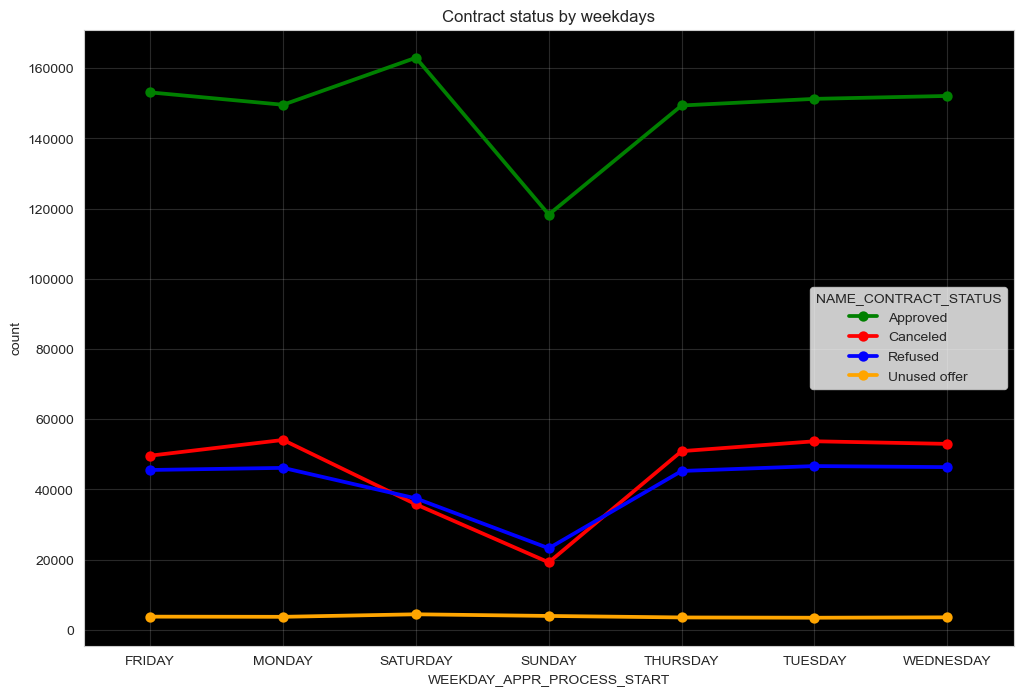

In [64]:
hr = pd.crosstab(previous_application["WEEKDAY_APPR_PROCESS_START"], previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12, 8))
ax = sns.pointplot(x="WEEKDAY_APPR_PROCESS_START", y=0, data=hr, hue="NAME_CONTRACT_STATUS", palette=["g", "r", "b", "orange"], scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Contract status by weekdays")
plt.grid(True, alpha=.2)


# Contract status by hour of the day -

HOUR_APPR_PROCESS_START - Approximately at what day hour did the client apply for the previous application.

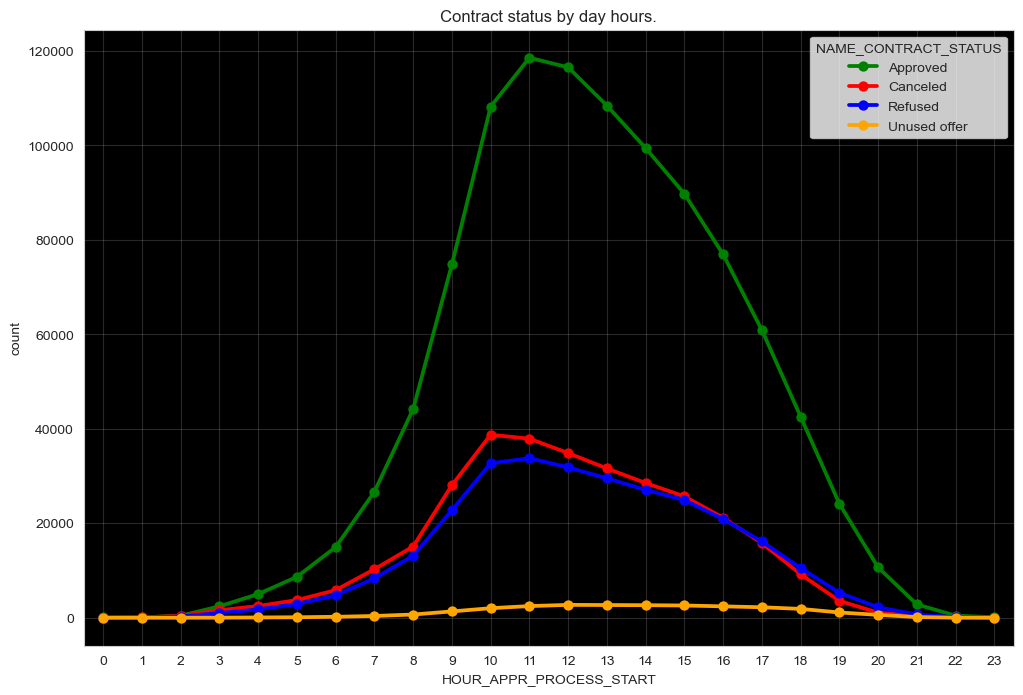

In [67]:
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"],previous_application["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(x = "HOUR_APPR_PROCESS_START",y = 0 ,data = hr ,hue="NAME_CONTRACT_STATUS",palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Contract status by day hours.")
plt.grid(True,alpha=.2)

Point to infer from the graph -

Morning 11'o clock have maximum number of approvals.

Morning 10'o clock have maximum number of refused and cancelled contracts.

# Peak hours for week days for applying loans.

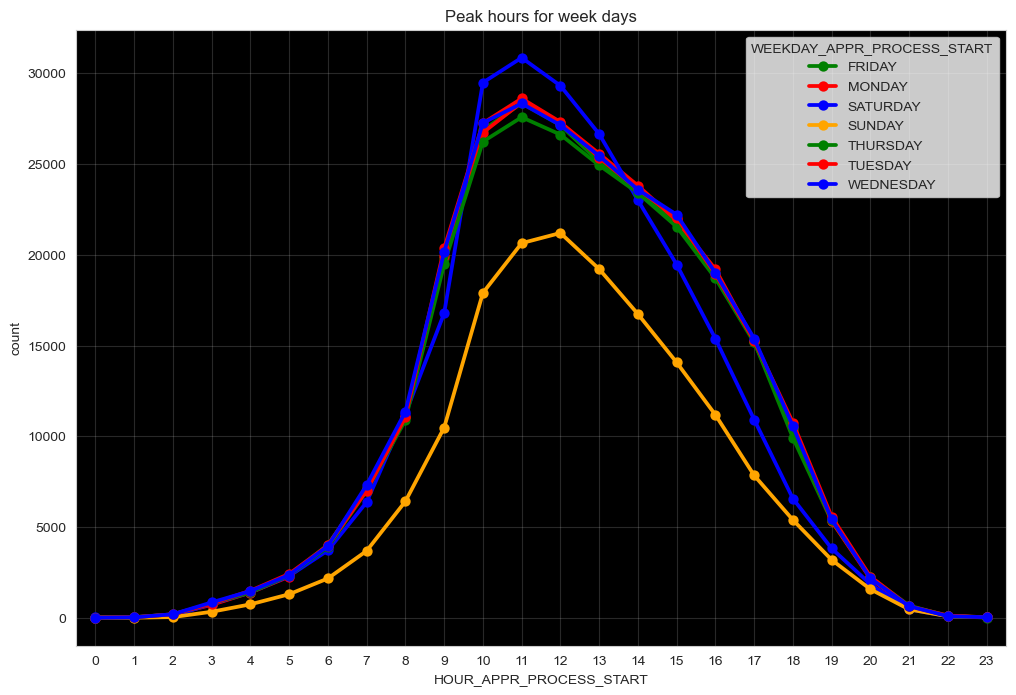

In [70]:
hr = pd.crosstab(previous_application["HOUR_APPR_PROCESS_START"],previous_application["WEEKDAY_APPR_PROCESS_START"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(x = "HOUR_APPR_PROCESS_START",y = 0,data = hr ,hue="WEEKDAY_APPR_PROCESS_START",palette=["g","r","b","orange"],scale=1)
ax.set_facecolor("k")
ax.set_ylabel("count")
ax.set_title("Peak hours for week days")
plt.grid(True,alpha=.2)

# Percentage of applications accepted,cancelled,refused and unused for different loan purposes.

NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan.

NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application.

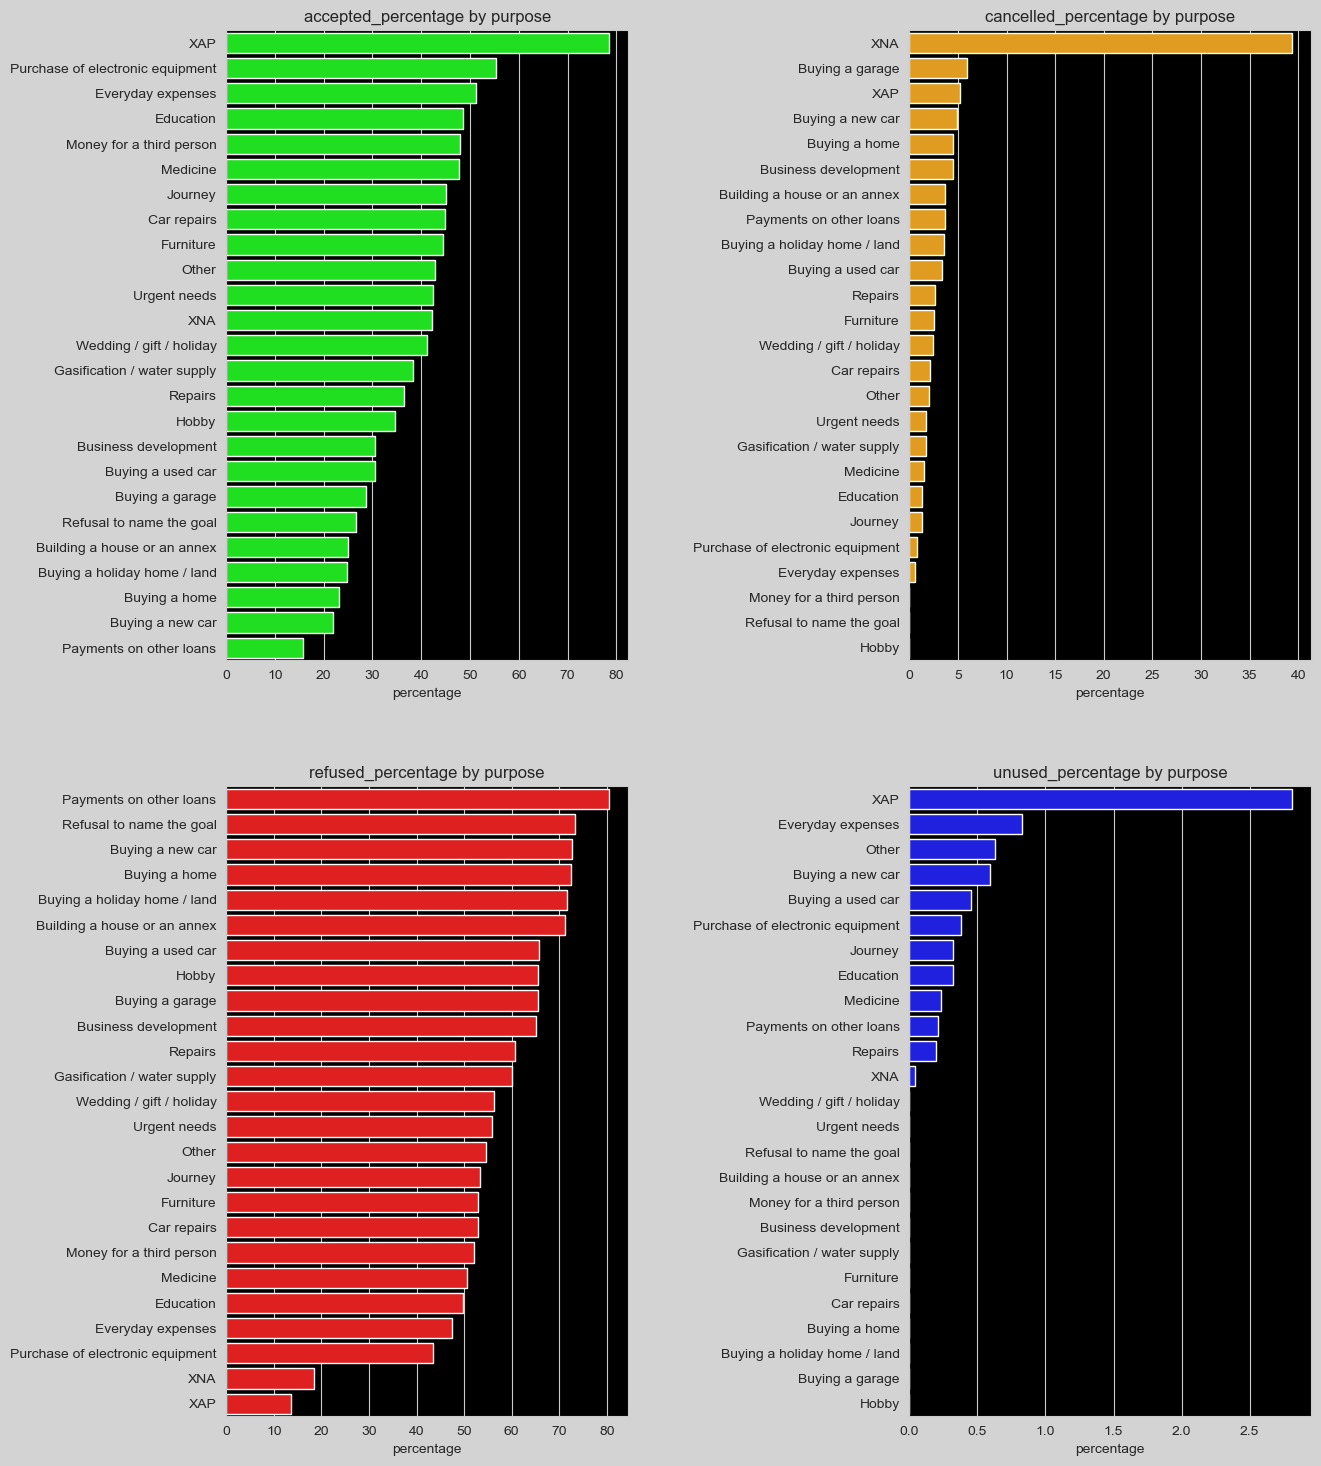

In [72]:
previous_application[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
purpose = pd.crosstab(previous_application["NAME_CASH_LOAN_PURPOSE"],previous_application["NAME_CONTRACT_STATUS"])
purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose_new = purpose[["a","c","r","u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({"a":"accepted_percentage","c":"cancelled_percentage",
                                                               "r":"refused_percentage","u":"unused_percentage"})
lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime","orange","r","b"]

fig = plt.figure(figsize=(14,18))
fig.set_facecolor("lightgrey")
for i,j,k in itertools.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(x = 0,y = "NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by purpose")
    plt.subplots_adjust(wspace = .7)
    ax.set_facecolor("k")

Point to infer from the graph -

Purposes like XAP ,electronic eqipment ,everey day expences and education have maximum loan acceptance.

Loan puposes like payment of other loans ,refusal to name goal ,buying new home or car have most refusals.

40% of XNA purpose loans are cancelled.

# Contract status relative to decision made about previous application.

DAYS_DECISION - Relative to current application when was the decision about previous application made.

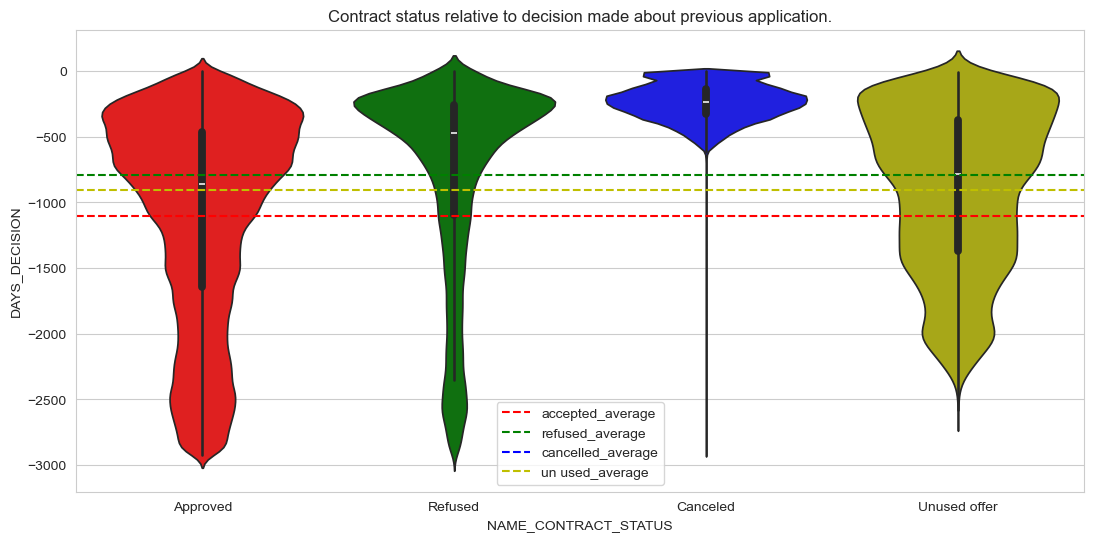

In [73]:
plt.figure(figsize=(13,6))
sns.violinplot(y= previous_application["DAYS_DECISION"],
               x = previous_application["NAME_CONTRACT_STATUS"],palette=["r","g","b","y"])
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Approved"]["DAYS_DECISION"].mean(),
            color="r",linestyle="dashed",label="accepted_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Refused"]["DAYS_DECISION"].mean(),
            color="g",linestyle="dashed",label="refused_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Cancelled"]["DAYS_DECISION"].mean(),color="b",
            linestyle="dashed",label="cancelled_average")
plt.axhline(previous_application[previous_application["NAME_CONTRACT_STATUS"] == "Unused offer"]["DAYS_DECISION"].mean(),color="y",
            linestyle="dashed",label="un used_average")
plt.legend(loc="best")

plt.title("Contract status relative to decision made about previous application.")
plt.show()

Point to infer from the graph -

On average approved contract types have higher number of decision days compared to cancelled and refused contracts.

# Client payment methods & reasons for application rejections 

NAME_PAYMENT_TYPE - Payment method that client chose to pay for the previous application.

CODE_REJECT_REASON - Why was the previous application rejected.

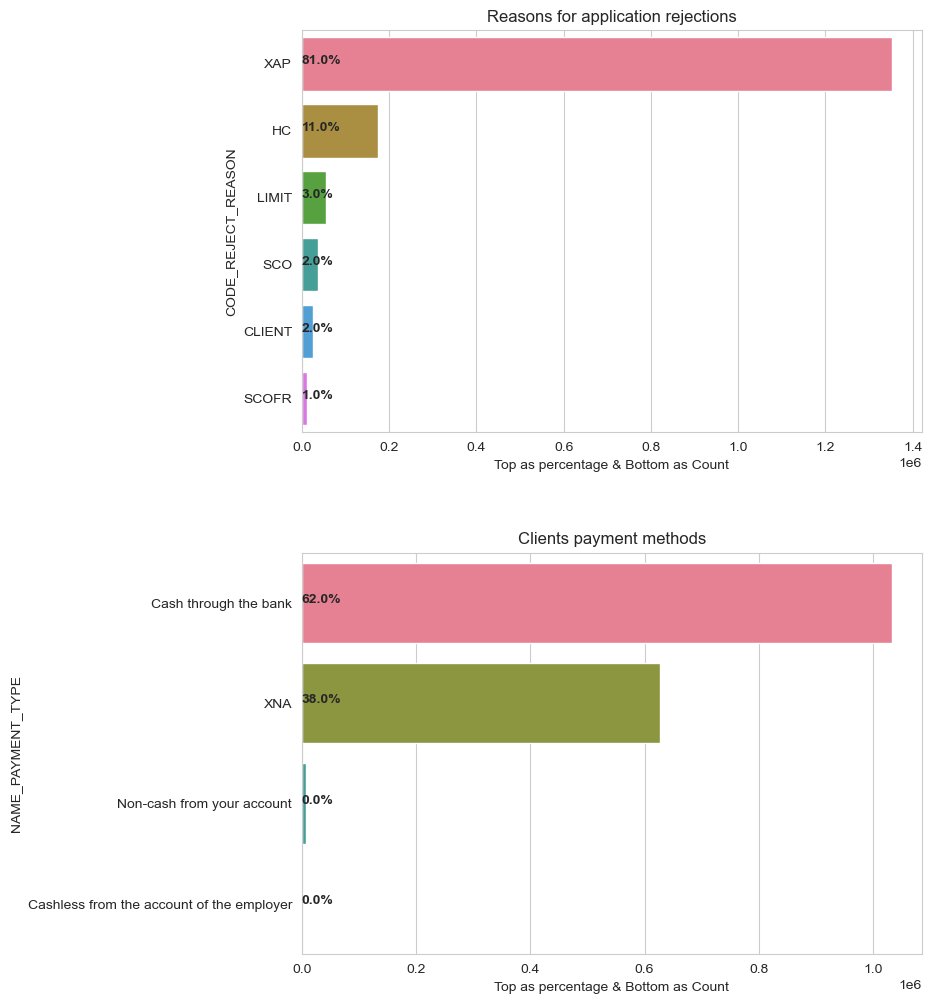

In [80]:
plt.figure(figsize=(8,12))

# First subplot
plt.subplot(211)
rej = previous_application["CODE_REJECT_REASON"].value_counts().reset_index()
rej.columns = ["CODE_REJECT_REASON", "Count"]  # Rename columns for clarity
ax = sns.barplot(x="Count", y="CODE_REJECT_REASON", data=rej[:6], palette="husl")
for i, j in enumerate(np.around((rej["Count"][:6].values * 100 / rej["Count"][:6].sum()))):
    ax.text(j + 0.1, i, f'{j:.1f}%', weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

# Second subplot
plt.subplot(212)
pay = previous_application["NAME_PAYMENT_TYPE"].value_counts().reset_index()
pay.columns = ["NAME_PAYMENT_TYPE", "Count"]  # Rename columns for clarity
ax1 = sns.barplot(x="Count", y="NAME_PAYMENT_TYPE", data=pay, palette="husl")
for i, j in enumerate(np.around((pay["Count"].values * 100 / pay["Count"].sum()))):
    ax1.text(j + 0.1, i, f'{j:.1f}%', weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")

plt.subplots_adjust(hspace=.3)


Point to infer from the graph -

Around 81% of rejected applications the reason is XAP.

62% of chose to pay through cash by bank for previous applications.

# Distribution in Client suite type & client type.

NAME_TYPE_SUITE - Who accompanied client when applying for the previous application.

NAME_CLIENT_TYPE - Was the client old or new client when applying for the previous application.

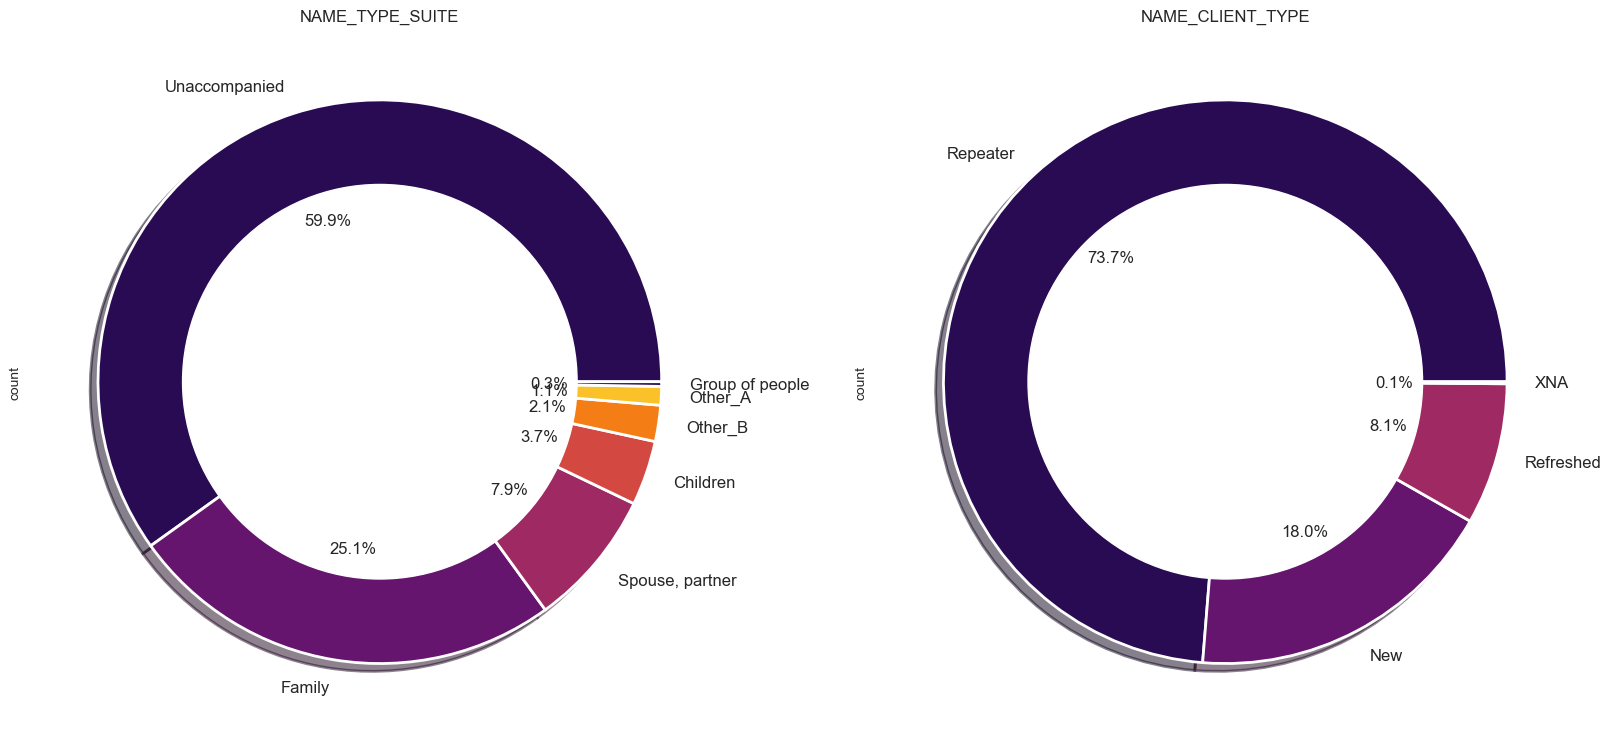

In [81]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_TYPE_SUITE")

plt.subplot(122)
previous_application["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("inferno"),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_CLIENT_TYPE")
plt.show()

Point to infer from the graph -

About 60% clients are un-accompained when applying for loans.

73% clients are old clients

# Popular goods for applying loans 

NAME_GOODS_CATEGORY - What kind of goods did the client apply for in the previous application.

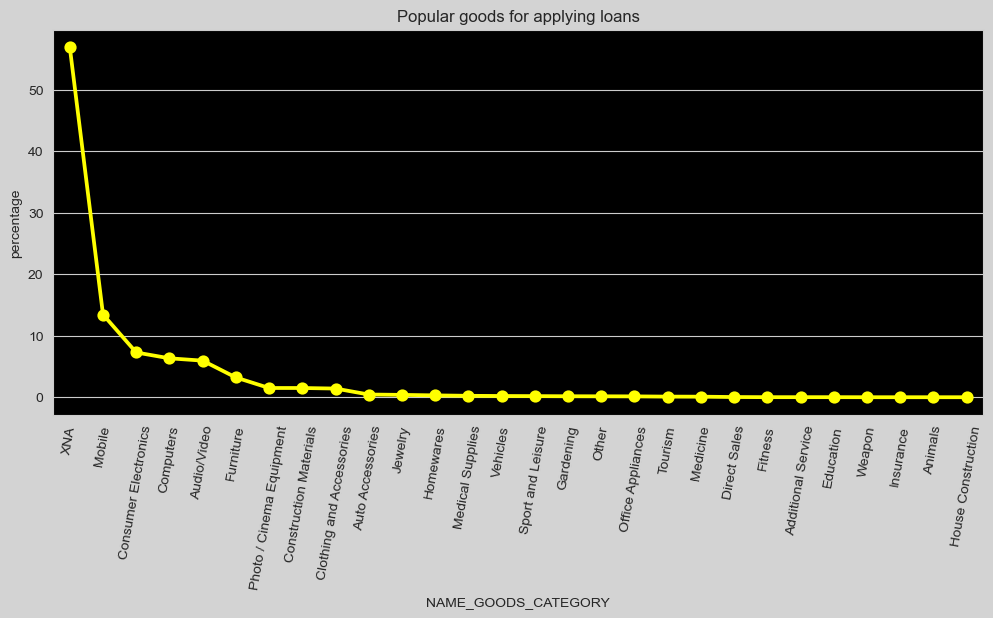

In [85]:
goods = previous_application["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods.columns = ["NAME_GOODS_CATEGORY", "Count"]  
goods["percentage"] = round(goods["Count"] * 100 / goods["Count"].sum(), 2)
fig = plt.figure(figsize=(12, 5))
ax = sns.pointplot(x="NAME_GOODS_CATEGORY", y="percentage", data=goods, color="yellow")
plt.xticks(rotation=80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("Popular goods for applying loans")
ax.set_facecolor("k")
fig.set_facecolor('lightgrey')

Point to infer from the graph -

XNA ,Mobiles ,Computers and consumer electronics are popular goods for applying loans

# Previous applications portfolio and product types

NAME_PORTFOLIO - Was the previous application for CASH, POS, CAR, …

NAME_PRODUCT_TYPE - Was the previous application x-sell o walk-in.

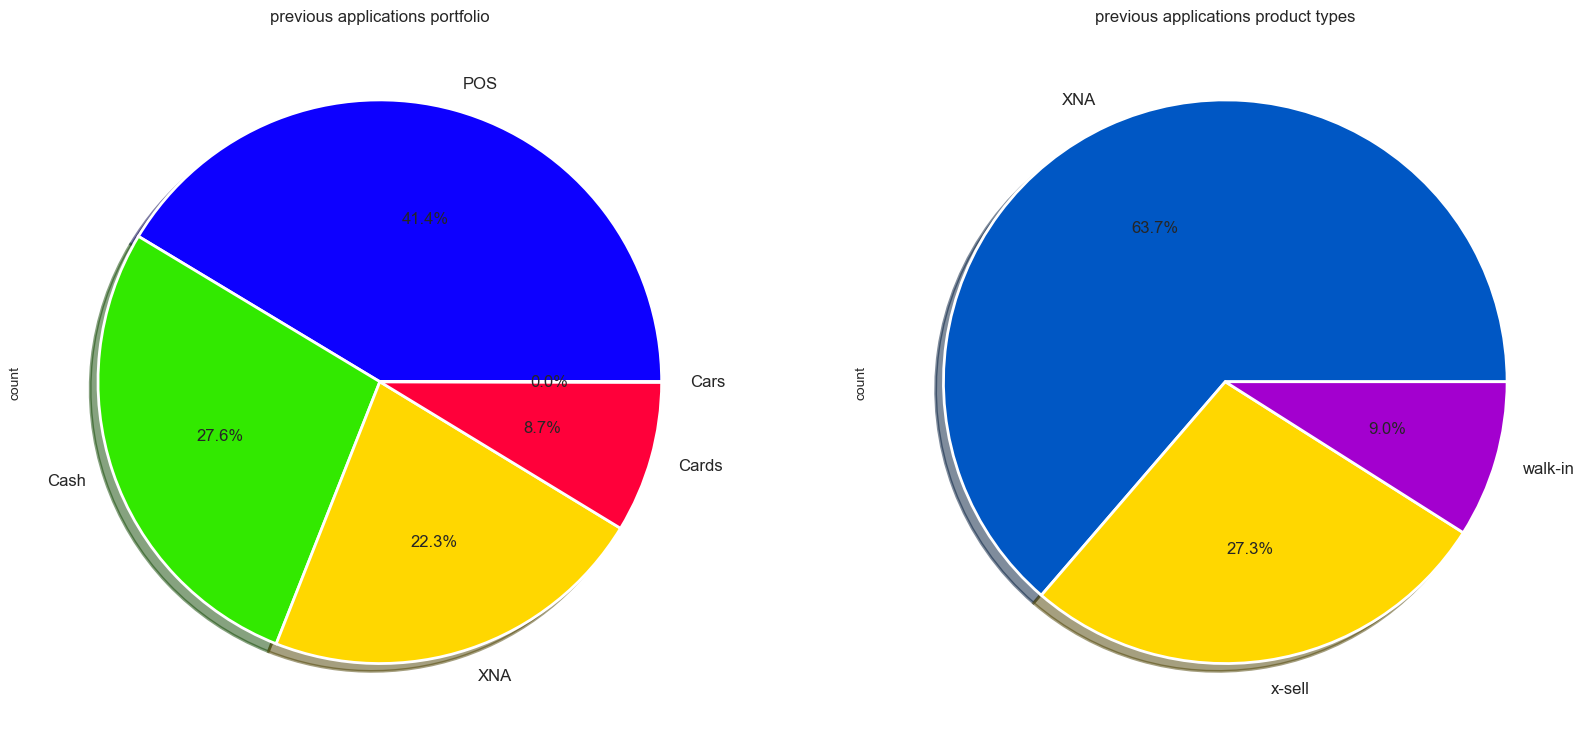

In [86]:
plt.figure(figsize=(20,20))
plt.subplot(121)
previous_application["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",5),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                               shadow =True)
plt.title("previous applications portfolio")
plt.subplot(122)
previous_application["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
                                                             colors = sns.color_palette("prism",3),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},
                                                                  shadow =True)
plt.title("previous applications product types")
plt.show()

# Approval,canceled and refusal rates by channel types.

CHANNEL_TYPE - Through which channel we acquired the client on the previous application.

NAME_CONTRACT_STATUS- Contract status (approved, cancelled, ...) of previous application.

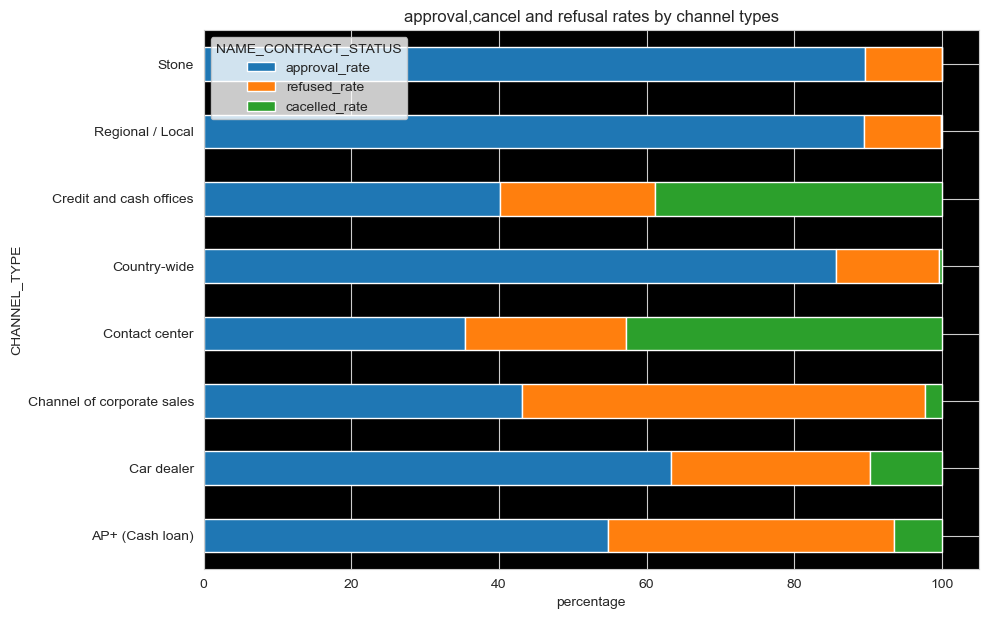

In [87]:
app = pd.crosstab(previous_application["CHANNEL_TYPE"],previous_application["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

Point to infer from the graph -

Channel types like Stone ,regional and country-wide have maximum approval rates.

Channel of coorporate sales have maximum refusal rate.

Credit-cash centres and Contact centres have maximum cancellation rates.

# Highest amount credited seller areas and industries.

SELLERPLACE_AREA - Selling area of seller place of the previous application.

NAME_SELLER_INDUSTRY - The industry of the seller.

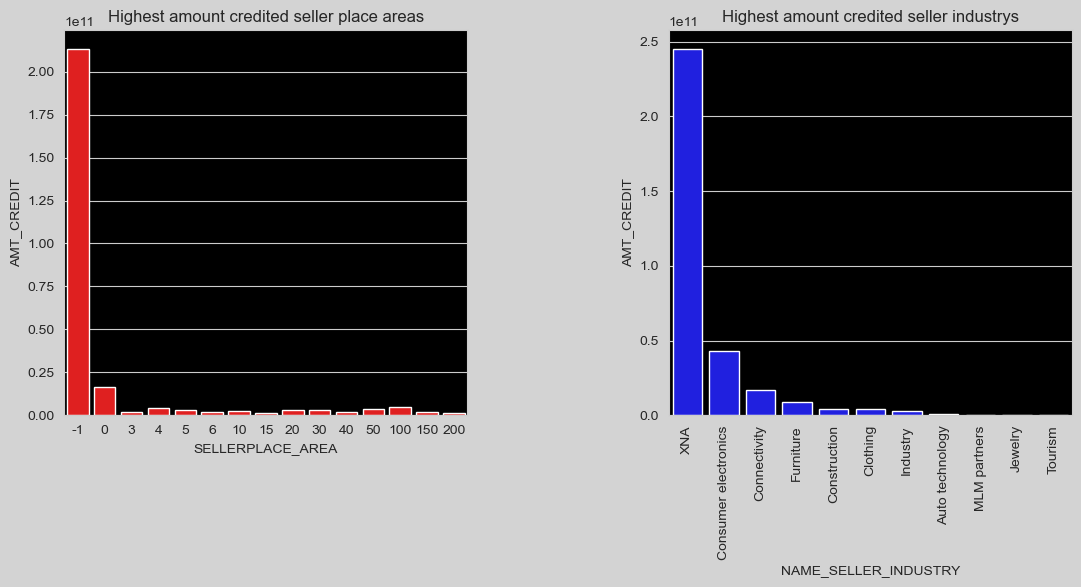

In [88]:
fig = plt.figure(figsize=(13,5))
plt.subplot(121)
are = previous_application.groupby("SELLERPLACE_AREA")["AMT_CREDIT"].sum().reset_index()
are = are.sort_values(by ="AMT_CREDIT",ascending = False)
ax = sns.barplot(y= "AMT_CREDIT",x ="SELLERPLACE_AREA",data=are[:15],color="r")
ax.set_facecolor("k")
ax.set_title("Highest amount credited seller place areas")

plt.subplot(122)
sell = previous_application.groupby("NAME_SELLER_INDUSTRY")["AMT_CREDIT"].sum().reset_index().sort_values(by = "AMT_CREDIT",ascending = False)
ax1=sns.barplot(y = "AMT_CREDIT",x = "NAME_SELLER_INDUSTRY",data=sell,color="b")
ax1.set_facecolor("k")
ax1.set_title("Highest amount credited seller industrys")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace = .5)
fig.set_facecolor("lightgrey")

# Popular terms of previous credit at application.

CNT_PAYMENT - Term of previous credit at application of the previous application.

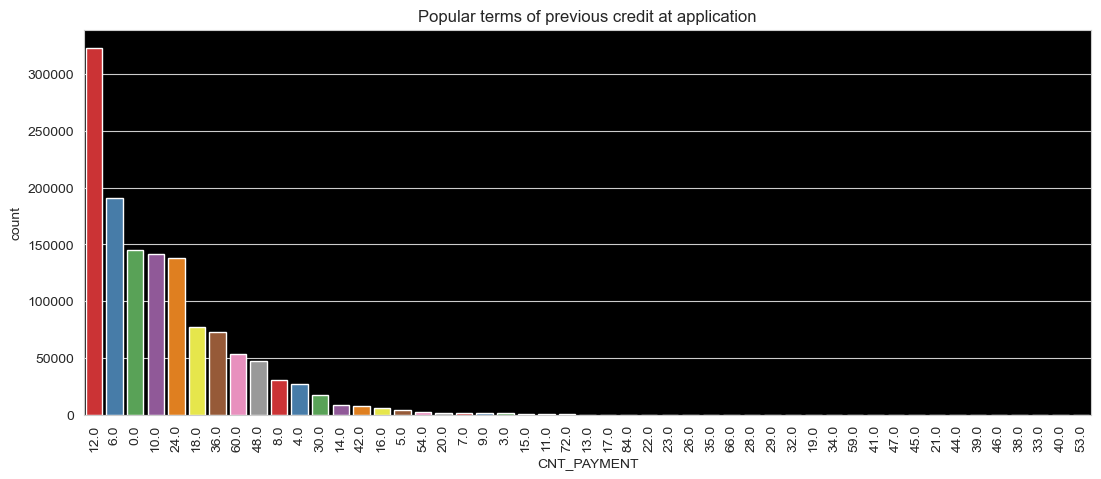

In [90]:
plt.figure(figsize=(13, 5))
ax = sns.countplot(x="CNT_PAYMENT", data=previous_application, palette="Set1", order=previous_application["CNT_PAYMENT"].value_counts().index)
ax.set_facecolor("k")
plt.xticks(rotation=90)
plt.title("Popular terms of previous credit at application")
plt.show()

Point to infer from the graph - 

Popular term of previous credit are 6months ,10months ,1year ,2years & 3 years.

# Detailed product combination of the previous application

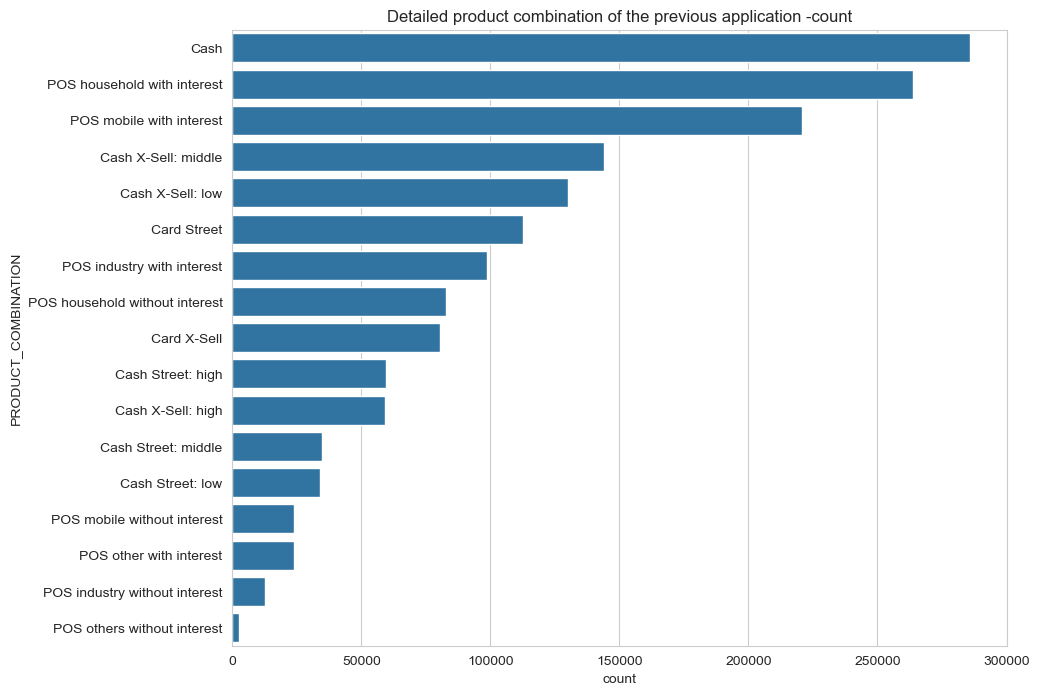

In [91]:
plt.figure(figsize=(10,8))
sns.countplot(y = previous_application["PRODUCT_COMBINATION"],order=previous_application["PRODUCT_COMBINATION"].value_counts().index)
plt.title("Detailed product combination of the previous application -count")
plt.show()

# Frequency distribution of intrest rates and client insurance requests

NAME_YIELD_GROUP - Grouped interest rate into small medium and high of the previous application.

NFLAG_INSURED_ON_APPROVAL - Did the client requested insurance during the previous application.

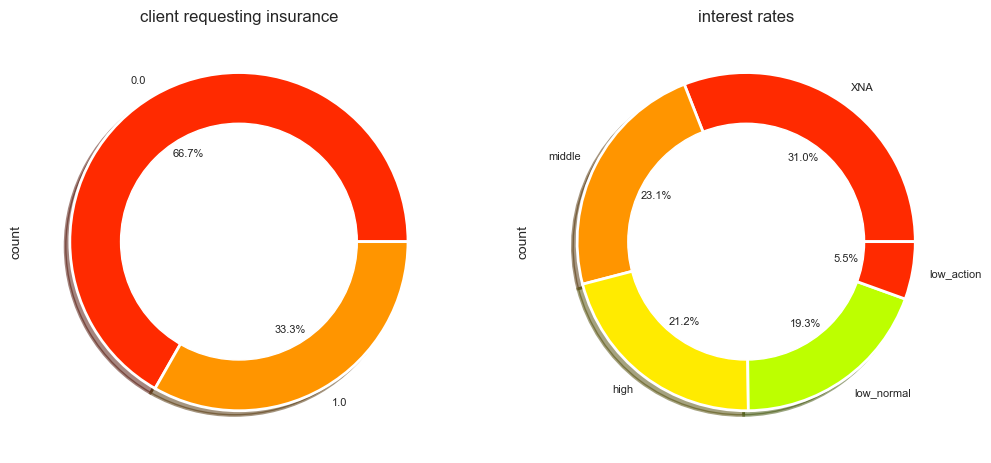

In [92]:
plt.figure(figsize=(12,6))
plt.subplot(121)
previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("client requesting insurance")

plt.subplot(122)
previous_application["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
                                                             colors = sns.color_palette("prism",4),
                                              wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("interest rates")
plt.show()

# Days variables - Relative to application date of current application

DAYS_FIRST_DRAWING - Relative to application date of current application when was the first disbursement of the previous application.

DAYS_FIRST_DUE - Relative to application date of current application when was the first due supposed to be of the previous application.

DAYS_LAST_DUE_1ST_VERSION - Relative to application date of current application when was the first due of the previous application.

DAYS_LAST_DUE -Relative to application date of current application when was the last due date of the previous application.

DAYS_TERMINATION - Relative to application date of current application when was the expected termination of the previous application.

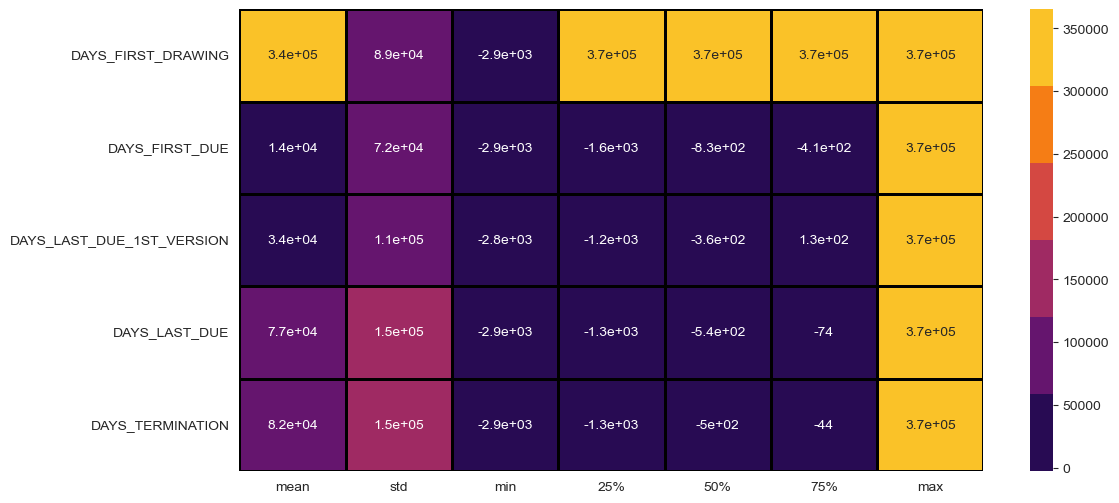

In [93]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(previous_application[cols].describe()[1:].transpose(),
            annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

# Correlation between variables in Previous Application 

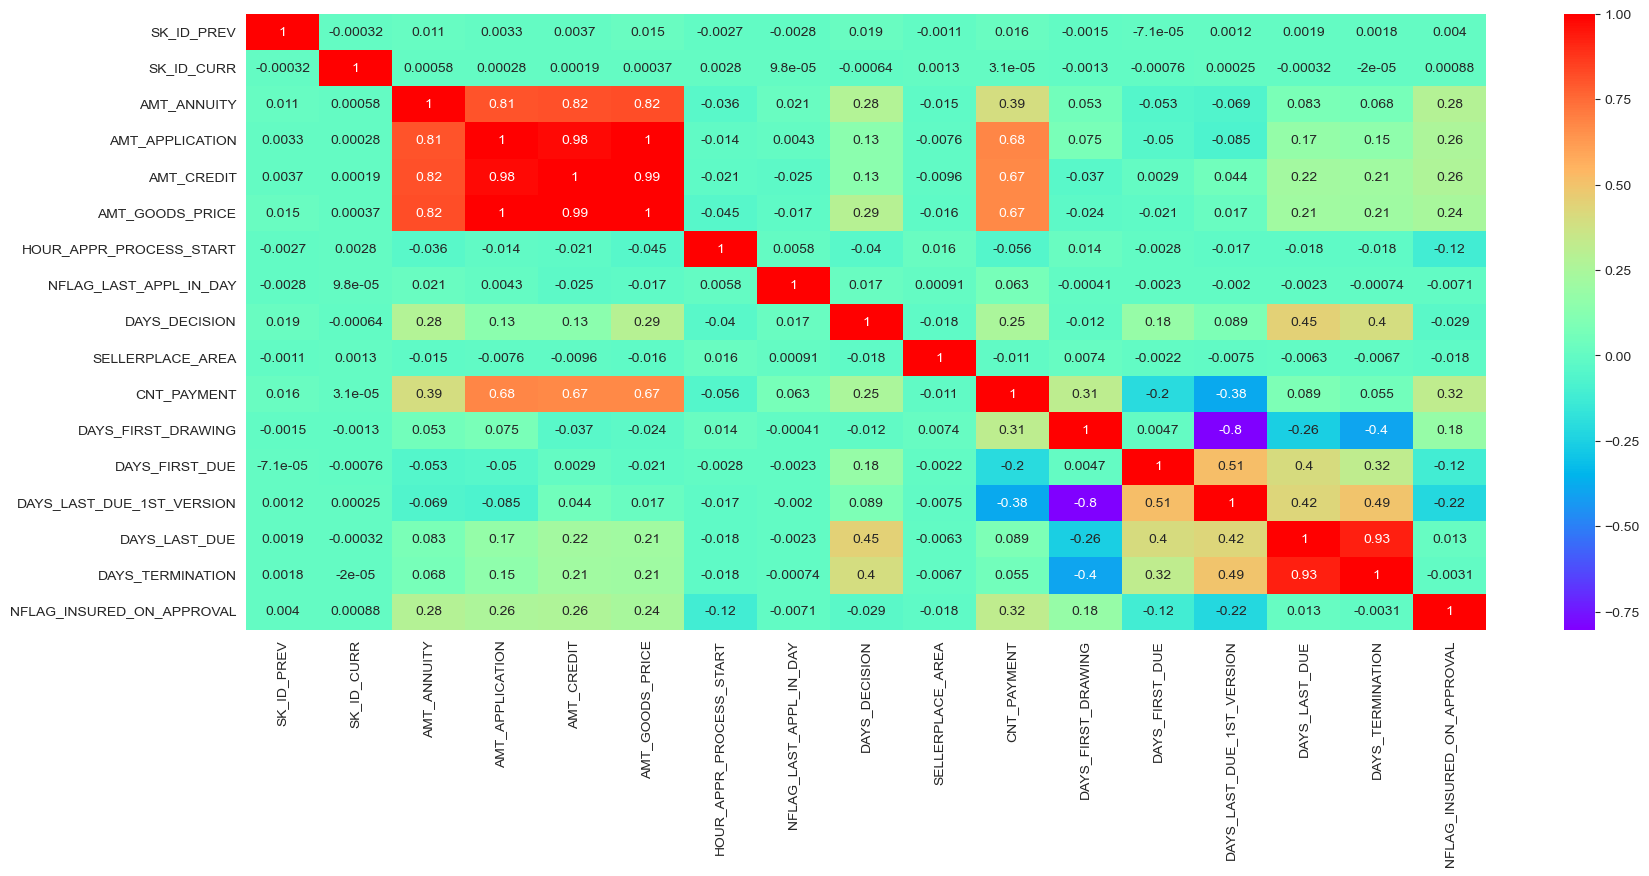

In [96]:
numeric_data = previous_application.select_dtypes(include=[float, int])
corrmat = numeric_data.corr()

f, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corrmat, ax=ax, cmap="rainbow", annot=True)
plt.show()

In [98]:
numeric_data = previous_application.select_dtypes(include=[np.number])
corrmat = numeric_data.corr()

mask = np.triu(np.ones_like(corrmat, dtype=bool), k=1)
corrmat = corrmat.where(mask)

corrdf = corrmat.stack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']

corrdf.dropna(subset=['Correlation'], inplace=True)

corrdf['Correlation'] = abs(corrdf['Correlation'].round(2))

top_correlations = corrdf.sort_values(by='Correlation', ascending=False).head(10)


In [99]:
top_correlations

,Var1,Var2,Correlation
46,AMT_APPLICATION,AMT_GOODS_PRICE,1.00
58,AMT_CREDIT,AMT_GOODS_PRICE,0.99
45,AMT_APPLICATION,AMT_CREDIT,0.98
133,DAYS_LAST_DUE,DAYS_TERMINATION,0.93
33,AMT_ANNUITY,AMT_GOODS_PRICE,0.82
32,AMT_ANNUITY,AMT_CREDIT,0.82
31,AMT_ANNUITY,AMT_APPLICATION,0.81
122,DAYS_FIRST_DRAWING,DAYS_LAST_DUE_1ST_VERSION,0.80
51,AMT_APPLICATION,CNT_PAYMENT,0.68
63,AMT_CREDIT,CNT_PAYMENT,0.67
